/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,34,42) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


precursor assign finished


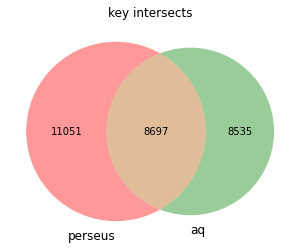

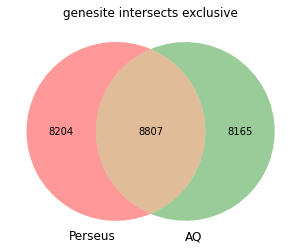

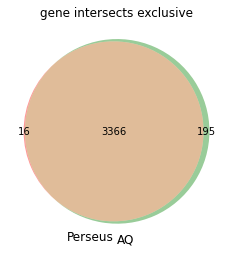

In [ ]:
import pandas as pd
import compare_functions as cf
from matplotlib_venn import venn2

original_input_df = cf.get_shortened_aq_input()
original_input_df["exprec"] = [cf.get_exp_precursor_id(sample, prec) for sample, prec in original_input_df[["R.FileName", "FG.Id"]].itertuples(index=False)]
all_exp_precursors = cf.get_all_expprecs(original_input_df)

perseus_df = cf.load_perseus_df()
keydf_perseus = cf.get_collapse_df(perseus_df)

aq_df = cf.load_aq_df()
keydf_aq = cf.get_collapse_df(aq_df)

key2prec_perseus = cf.get_key2precursors_perseus(perseus_df)
key2expprecursors_perseus = cf.get_key2expprecursors_perseus(perseus_df, key2prec_perseus, all_exp_precursors)

key2expprecursors_aq = cf.get_key2expprecursors_aq(aq_df, all_exp_precursors)

pers_keys = set(key2expprecursors_perseus.keys())
aq_keys = set(key2expprecursors_aq.keys())


venn2([pers_keys, aq_keys], ["perseus", "aq"])
plt.title("key intersects")
plt.show()


perseus_genesites = {x.split("_")[0] + "_" + x.split("_")[1] for x in pers_keys}
aq_genesites = {x.split("_")[0] + "_" + x.split("_")[1] for x in aq_keys}

venn2([perseus_genesites, aq_genesites], ["Perseus","AQ"])
plt.title("genesite intersects exclusive")
plt.show()


perseus_genes = {x.split("_")[0] for x in pers_keys}
aq_genes = {x.split("_")[0] for x in aq_keys}

venn2([perseus_genes, aq_genes], ["Perseus", "AQ"])
plt.title("gene intersects exclusive")
plt.show()


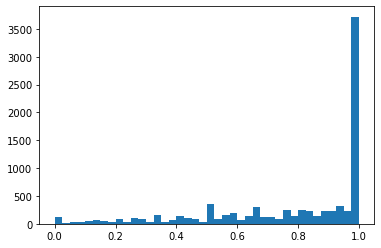

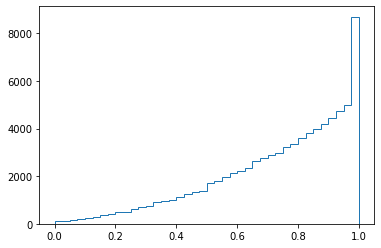

In [ ]:
#check precursor overlaps on matching keys
import matplotlib.pyplot as plt
import numpy as np
intersect_keys = np.array(list(keys_perseus.intersection(keys_aq)))
ionvec_pers = [set(key2expprecursors_perseus.get(x)) for x in intersect_keys]
ionvec_aq = [set(key2expprecursors_aq.get(x)) for x in intersect_keys]

fraction_overlaps = np.array([len(pers_ions.intersection(aq_ions))/len(pers_ions.union(aq_ions)) for pers_ions, aq_ions in zip(ionvec_pers, ionvec_aq)])

plt.hist(fraction_overlaps, bins=40)
plt.show()
plt.hist(fraction_overlaps, bins = 40, cumulative = True, histtype='step')
plt.show()

zero_overlap_idxs = np.where(fraction_overlaps==0)[0]
total_overlap_idxs = np.where(fraction_overlaps==1)[0]
zero_overlap_keys = intersect_keys[zero_overlap_idxs]
total_overlap_keys = intersect_keys[total_overlap_idxs]

# print(total_overlap_keys)
#print(zero_overlap_keys)

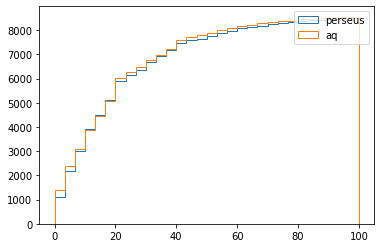

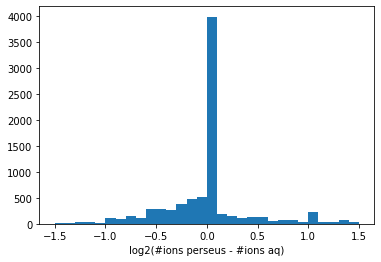

perseus larger: 2098  aq larger: 2809  equal size: 3790


In [ ]:
# check numbers of precursors per key
precs_per_key_pers = np.array([len(pers_ions) for pers_ions in ionvec_pers])
precs_per_key_aq = np.array([len(aq_ions) for aq_ions in ionvec_aq])


plt.hist(precs_per_key_pers, bins=30, range = [0, 100],cumulative=True,label= "perseus", histtype = "step")
plt.hist(precs_per_key_aq, bins = 30, range = [0, 100],cumulative=True,label = "aq",histtype='step')

plt.legend()
plt.show()

relative_ratios = np.array([np.log2(len(pers_ions)/len(aq_ions)) for pers_ions, aq_ions in zip(ionvec_pers, ionvec_aq)])

plt.hist(relative_ratios, bins = 30, range = [-1.5, 1.5], cumulative=False )
plt.xlabel("log2(#ions perseus - #ions aq)")
plt.show()
print(f"perseus larger: {sum(relative_ratios>0)}  aq larger: {sum(relative_ratios<0)}  equal size: {sum(relative_ratios==0)}")



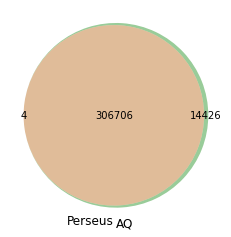

In [ ]:
#compare number of expprecs in both datasets
from matplotlib_venn import venn2
expprecs_pers = [set(x) for x in key2expprecursors_perseus.values()]
expprecs_aq = [set(x) for x in key2expprecursors_aq.values()]

expprecs_pers = set().union(*expprecs_pers)
expprecs_aq = set().union(*expprecs_aq)

venn2([expprecs_pers, expprecs_aq], ["Perseus", "AQ"])

#display(expprecs_pers.difference(expprecs_aq))

#in the exclusive Perseus set, the protein ID could not be mapped 